In [1]:
import os
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline
relevant_path = "./record"
included_extensions = ['test.txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extensions)]
pattern = 'commands'
matching_files = [f for f in os.listdir(".") if pattern in f]
param = []
for f in matching_files:
    for line in open(f).readlines():
        param.append(line)

TypeError: 'Text' object is not callable

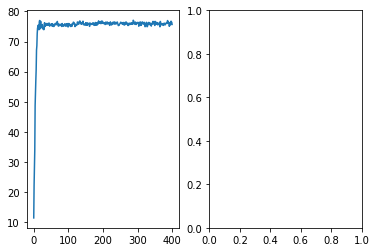

In [41]:
data = []
save_results = []
for line in param:
    run = (str.split(line)[-1]).replace('\"', '')
    for fp in file_names:
        if run in fp:
            data.append([line, fp])
for datum in data:
    title = datum[0]
    seriesX = []
    seriesY = []
    seriesXLoss = []
    seriesYLoss = []
    for line in (open("./record/"+ datum[1])).readlines():
        seriesX.append(float(str.split(line)[1]))
        seriesY.append(float(str.split(line)[-1].replace("%",'')))
        seriesXLoss.append(float(str.split(line)[1]))
        seriesYLoss.append(float(str.split(line)[-7].replace(",",'')))
#     print("Max accuracy:", max(seriesY))
#     fig, (ax1, ax2) = plt.subplots(2, 1)
#     fig.suptitle(datum[0])
#     ax1.plot(seriesX, seriesY)
#     ax2.plot(seriesXLoss, seriesYLoss)
#     plt.show()
    save_results.append([str.split(datum[0])[11], str.split(datum[0])[3], str.split(datum[0])[5],seriesX, seriesY, seriesXLoss, seriesYLoss])

save_results = sorted(save_results, key=itemgetter(1,2,0))
grouped_results = []
i = 0 
while i < len(save_results):
    j = i + 1
    while j < len(save_results):
        if save_results[i][1] == save_results[j][1] and save_results[i][2] == save_results[j][2]:
            grouped_results.append([save_results[i], save_results[j]])
        j+= 1
    i += 1

for results in grouped_results:
    fig, (ax1, ax2) = plt.subplots(1, 2)    
    ax1.plot(results[0][3], results[0][4], label=results[0][0])
    fig.suptitle("num_k="+ str(results[0][1]) + "   num_kq="+ str(results[0][2]))
    ax1.plot(results[1][3], results[1][4], label=results[1][0])
    ax1.legend()
    ax2.plot(results[0][5], results[0][6], label=results[0][0])
    ax2.title("num_k="+ str(results[0][1]) + "   num_kq="+ str(results[0][2]))
    ax2.plot(results[1][5], results[1][6], label=results[1][0])
    ax2.legend()

    plt.show()



In [14]:
%qtconsole

In [ ]:
%qtconsole